[![Open notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/afondiel/computer-vision-challenge/blob/main/L1_05_Face_Detection_with_Deep_Learning/notebooks/Face_Detection_CV_Stack.ipynb)


## Face Detection Computer Vision Stack

**Overview**

This is a basic framework for Face Detection using deep learning and VLMs.

**Key concepts:**
- detect faces
- identify key facial features
- draw contours
- recognize expressions
- process video frames in real time.

### Step 1: Set up the Colab environment

In [2]:
!pip install opencv-python dlib

### Step 2: Import the necessary libraries

In [21]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
# solve bug cv2.imshow
from google.colab.patches import cv2_imshow

In [12]:
print(dlib.__version__)

19.24.4


### Step 3: Load the facial detection model and facial landmarks predictor


In [8]:
# Download & unpack dlib's mode landmark: shape_predictor_68_face_landmarks.dat` file from dlib repositor: http://dlib.net/files/

# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# Unpack the bz2 file
# !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O - | bzip2 -d > shape_predictor_68_face_landmarks.dat

# !pip install dlib

--2024-07-01 18:41:48--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  47.2MB/s    in 1.3s    

2024-07-01 18:41:49 (47.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [15]:
# Load dlib's face detector
detector = dlib.get_frontal_face_detector()

# Load dlib's shape predictor model for facial landmarks
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')  # Make sure to download this file

### Step 4: Define functions to detect faces, facial landmarks, and draw contours

In [24]:
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    return faces

def get_facial_landmarks(image, faces):
    landmarks = []
    for face in faces:
        shape = predictor(image, face)
        landmarks.append(shape)
    return landmarks

def draw_landmarks(image, landmarks):
    for shape in landmarks:
        for i in range(0, 68):
            part = shape.part(i)
            cv2.circle(image, (part.x, part.y), 2, (0, 255, 0), -1)
    return image

def draw_contours(image, landmarks):
    for shape in landmarks:
        points = [(shape.part(i).x, shape.part(i).y) for i in range(68)]
        points = np.array(points, dtype=np.int32)

        hull = cv2.convexHull(points)
        cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    return image

### Step 5: Define a function to recognize facial expressions

In [25]:
def recognize_expression(landmarks):
    expressions = []
    for shape in landmarks:
        mouth = shape.part(48).y - shape.part(62).y
        if mouth > 20:
            expressions.append('Smiling')
        else:
            expressions.append('Neutral')
    return expressions

### Step 6: Process the image

In [26]:
def process_image(image_path):
    image = cv2.imread(image_path)
    faces = detect_faces(image)
    landmarks = get_facial_landmarks(image, faces)
    image_with_landmarks = draw_landmarks(image.copy(), landmarks)
    image_with_contours = draw_contours(image.copy(), landmarks)
    expressions = recognize_expression(landmarks)

    return image, image_with_landmarks, image_with_contours, expressions

### Step 7: Display the results

In [27]:
def display_images(images, titles):
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()


### Load Dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k  100  120k    0     0   425k      0 --:--:-- --:--:-- --:--:--  426k


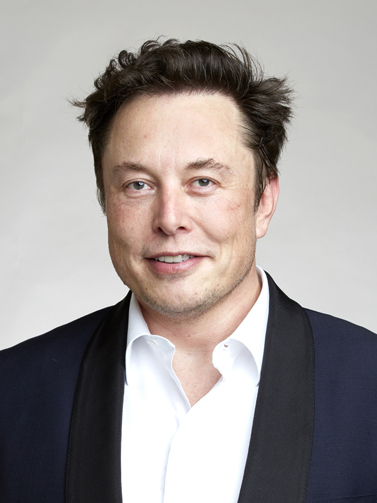

In [28]:
# Test datasets
# img1 = https://developers.google.com/static/ml-kit/vision/face-detection/images/1024px-Physicist_Stephen_Hawking_in_Zero_Gravity_NASA.jpg
# img2 = https://upload.wikimedia.org/wikipedia/commons/d/d8/Elon_Musk_Royal_Society_%28cropped%29.jpg
# img3 = https://developers.google.com/static/ml-kit/vision/face-detection/images/face_contours.svg

!curl -o musk.jpg "https://upload.wikimedia.org/wikipedia/commons/d/d8/Elon_Musk_Royal_Society_%28cropped%29.jpg"

image_path = cv2.imread('musk.jpg')
cv2_imshow(image_path)

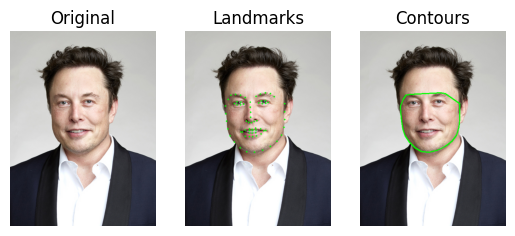

Facial Expressions: ['Neutral']


In [29]:
image_path = 'musk.jpg'  # Replace with your image file path

original_image, image_with_landmarks, image_with_contours, expressions = process_image(image_path)

display_images([original_image, image_with_landmarks, image_with_contours], ['Original', 'Landmarks', 'Contours'])

print("Facial Expressions:", expressions)

### Step 8: Process video frames in real-time (Optional)

- To process video frames in real-time, you can use OpenCV to capture video frames and apply the above functions to each frame.
- This is an advanced step and will require a more complex setup.


### Step 9: Example of video processing

In [6]:
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            faces = detect_faces(frame)
            landmarks = get_facial_landmarks(frame, faces)
            frame_with_landmarks = draw_landmarks(frame.copy(), landmarks)
            frame_with_contours = draw_contours(frame.copy(), landmarks)
            expressions = recognize_expression(landmarks)

            cv2.imshow('Frame', frame_with_contours)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    cap.release()
    cv2.destroyAllWindows()

video_path = 'your_video.mp4'  # Replace with your video file path
process_video(video_path)

## References

- [Face Detection Google Dev ML-Kit API](https://developers.google.com/ml-kit/vision/face-detection)

Blog:

- https://machinelearningmastery.com/introduction-to-deep-learning-for-face-recognition/
- https://towardsdatascience.com/facial-recognition-using-deep-learning-a74e9059a150

Vision-Language Models (VLMs):


- [https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/36368.pdf](Towards Multimodal Vision-Language Models Generating Non-Generic Text)
- [Prompting Visual-Language Models for Dynamic Facial Expression Recognition](https://arxiv.org/pdf/2308.13382)


Books:

- [Facial Recognition Books - @manjunath5496](https://github.com/manjunath5496/Face-Recognition-Books/tree/master)
- [Handbook of Face Recognition 2nd ed. 2011 Edition
by Stan Z. Li (Editor), Anil K. Jain (Editor)](https://www.amazon.com/Handbook-Face-Recognition-Stan-Z/dp/085729931X/ref=as_li_ss_tl?ie=UTF8&qid=1551046348&sr=8-1&keywords=Handbook+of+Face+Recognition&linkCode=sl1&tag=inspiredalgor-20&linkId=f7911d8d0a87a5449fb48071b1c5ad1a&language=en_US)
- [Handbook of Face Recognition
(The Second Edition) - Overview Google Research](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/36368.pdf)